<a href="https://colab.research.google.com/github/ManelSoengas/tutorials/blob/main/embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gensim


In [2]:
from gensim.models import Word2Vec

# Creamos un pequeño corpus de frases
sentences = [
    ["inteligencia", "artificial", "es", "fascinante"],
    ["la", "IA", "está", "revolucionando", "la", "educación"],
    ["los", "modelos", "de", "machine", "learning", "aprenden", "de", "los", "datos"],
    ["el", "procesamiento", "de", "lenguaje", "natural", "es", "clave", "en", "la", "IA"],
    ["la", "IA", "en", "educación", "puede", "personalizar", "el", "aprendizaje"]
]

# Entrenamos el modelo Word2Vec usando el corpus
model = Word2Vec(sentences, vector_size=50, window=5, min_count=1, sg=1)

# Accedemos al embedding de una palabra
vector_ia = model.wv["IA"]
print(f"Vector de 'IA':\n{vector_ia}")


Vector de 'IA':
[-0.01632136  0.00899166 -0.00827738  0.00164762  0.01699128 -0.00893229
  0.00903294 -0.01357499 -0.00710122  0.01879312 -0.00315017  0.00063923
 -0.00827788 -0.01536613 -0.00302078  0.00494754 -0.00177152  0.01106639
 -0.00549452  0.00452963  0.01091286  0.01669811 -0.00290352 -0.01841134
  0.0087423   0.00114707  0.01489285 -0.00162187 -0.00527746 -0.01750833
 -0.00171122  0.00564363  0.01079523  0.01410364 -0.01140163  0.00371571
  0.01218006 -0.00960445 -0.00620827  0.01360155  0.00325789  0.00038681
  0.00694867  0.00043344  0.01923972  0.01012362 -0.01783019 -0.01407849
  0.00180558  0.01278481]


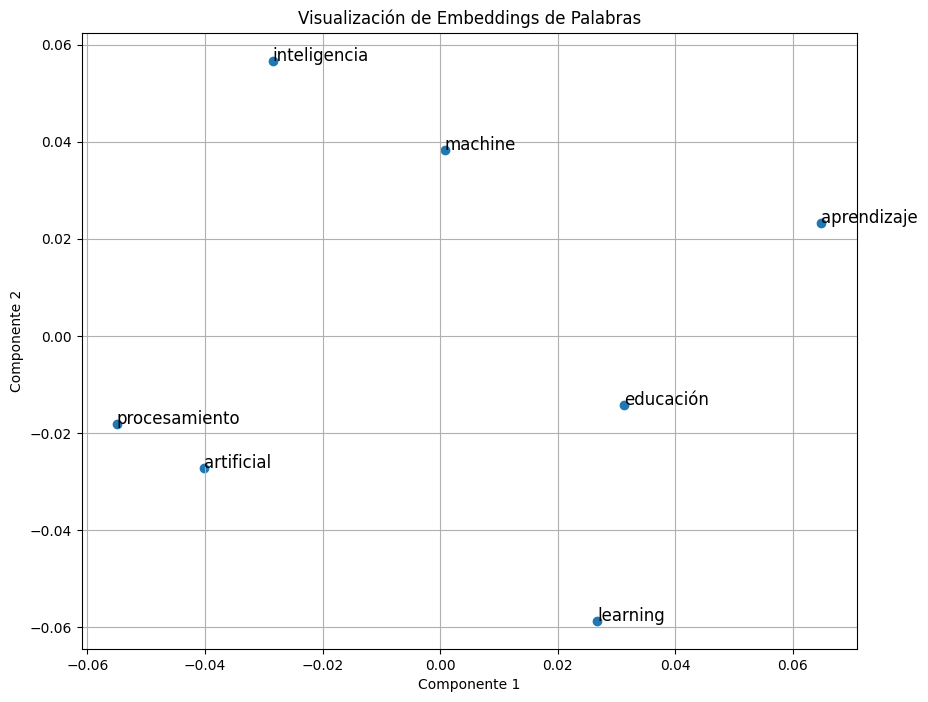

In [4]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Corpus de ejemplo
sentences = [
    ["la","inteligencia", "artificial", "es", "fascinante"],
    ["la", "inteligencia", "artificial", "está", "revolucionando", "la", "educación"],
    ["los", "modelos", "de","inteligencia", "artificial", "basados", "en", "machine", "learning", "aprenden", "de", "los", "datos"],
    ["el", "procesamiento", "de", "lenguaje", "natural", "es", "clave", "en", "la", "inteligencia", "artificial"],
    ["la", "inteligencia", "artificial", "en", "educación", "puede", "personalizar", "el", "aprendizaje"]
]

# Entrenamos el modelo Word2Vec en el corpus
model = Word2Vec(sentences, vector_size=50, window=5, min_count=1, sg=1)

# Seleccionamos algunas palabras para representar (por ejemplo, palabras clave del corpus)
words_to_visualize = ["educación", "inteligencia", "artificial", "machine", "learning", "aprendizaje", "procesamiento"]

# Extraemos los vectores de las palabras seleccionadas
word_vectors = [model.wv[word] for word in words_to_visualize]

# Reducimos a 2 dimensiones usando PCA
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

# Graficamos las palabras en 2D
plt.figure(figsize=(10, 8))
plt.scatter(result[:, 0], result[:, 1])

# Añadimos las etiquetas de cada palabra
for i, word in enumerate(words_to_visualize):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=12)

plt.title("Visualización de Embeddings de Palabras")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid()
plt.show()
